In [1]:
# Import Libraries
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Import data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle = True)

tensor(2)


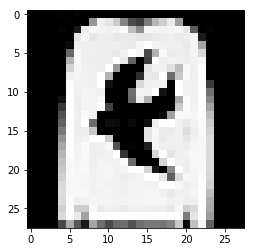

In [3]:
# Look at the data

images, labels = next(iter(trainloader))

print(labels[0])
plt.imshow(images[0].view(28,28), cmap = 'Greys_r')

In [4]:
# Define a NN architecture
n_hidden = [128,64]
n_output = 10

model = nn.Sequential(nn.Linear(784, n_hidden[0]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[0],n_hidden[1]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[1],n_output),
                     nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [5]:
# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
images, labels = next(iter(testloader))

prob = torch.exp(model(images.view(images.shape[0],-1)))

In [7]:
# Set up training loop and validation loops

epochs = 20

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss
        optimizer.step()
    else:
        
        test_loss = 0
        correct = 0
        with torch.no_grad():
            
            for images, labels in testloader:
                
                images = images.view(images.shape[0],-1)
                prob = torch.exp(model(images))
                top_p, top_class = prob.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                correct += torch.sum(equals.type(torch.FloatTensor))
                test_loss += criterion(model(images), labels)
        
    print(f'Epoch: {e+1}/{epochs}, train_loss: {running_loss/len(trainloader)}, test_loss: {test_loss/len(testloader)}, acc: {correct/len(testloader) }')    

Epoch: 1/20, train_loss: 0.5485377311706543, test_loss: 0.5142748951911926, acc: 52.044586181640625
Epoch: 2/20, train_loss: 0.44570496678352356, test_loss: 0.47719520330429077, acc: 52.649681091308594
Epoch: 3/20, train_loss: 0.4220578968524933, test_loss: 0.4454456865787506, acc: 53.624202728271484
Epoch: 4/20, train_loss: 0.40299850702285767, test_loss: 0.4518188238143921, acc: 53.45222854614258
Epoch: 5/20, train_loss: 0.3913276493549347, test_loss: 0.4416811466217041, acc: 53.87261199951172
Epoch: 6/20, train_loss: 0.387033075094223, test_loss: 0.48637303709983826, acc: 52.993629455566406
Epoch: 7/20, train_loss: 0.38190048933029175, test_loss: 0.43034425377845764, acc: 54.14012908935547
Epoch: 8/20, train_loss: 0.3729577660560608, test_loss: 0.4589309096336365, acc: 54.15286636352539
Epoch: 9/20, train_loss: 0.3710304796695709, test_loss: 0.4534868896007538, acc: 53.560508728027344
Epoch: 10/20, train_loss: 0.3735896050930023, test_loss: 0.4283982813358307, acc: 54.02547836303711

In [9]:
# Test the network with test set
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

img = img.resize_(1, 784)

ps = torch.exp(model(img))

print(ps.argmax())
print(labels[0])

tensor(4)
tensor(4)
